### Objective:
- To write gradient descent function from scratch
- To check its efficiency with Boston House Price dataset inbuilt in sklearn
- To compare this model with sklearn linear regression model and SGDRegressor

In [1]:
import pandas as pd
from sklearn import datasets
from scipy.spatial.distance import cosine
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = datasets.load_boston()

In [3]:
df = pd.DataFrame(data.data,columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
        'TAX', 'PTRATIO', 'B', 'LSTAT'])

In [4]:
df['target']=data.target

In [5]:
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
df[df.isnull().any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target


#### Functions: derivative and grad for scalar intercept term and vector term respectively

In [7]:
def derivative(X,y,W,W0):
    sum1 = 0.0
    
    '''
    for i in range(X.shape[1]):
        sum1 = sum1 + (y[i]-np.dot(W,X[i])-W0)
        #print(sum1)
        
    '''
    
    sum1 = (np.asscalar(np.sum(((y-np.matmul(X,W.T)))-W0)))
    
    sum1 = -2*sum1/(float(X.shape[0]))
  
    return sum1

def grad(X,y,W,W0):
    #sum1=(np.matmul(X.T,(y.reshape(y.shape[0],1)-np.matmul(X,W.T)-W0)))/(float(X.shape[0]))
    
    sum1 = np.matmul(X.T,(((y-np.matmul(X,W.T)))-W0))
    
    '''
    sum1 = np.zeros((W.shape[0],))
    for j in range(sum1.shape[0]):
        for i in range(X.shape[0]):
            sum1[j] = sum1[j] + X[i][j]*(y[i]-np.dot(W,X[i])-W0)
            #print(sum1[j])
        #(np.asscalar(np.sum((y-np.matmul(X,W.T)))-W0))
        sum1[j] = -2*sum1[j]/(float(X.shape[0]))
    '''
    
    sum1 = -2*sum1/(float(X.shape[0]))
    
    return sum1


#### Function: gradient descent

In [8]:
def grad_descent(X,y,W,W0,r):
    
    W=(W-r*(grad(X,y,W,W0)))
    W0=W0-r*(derivative(X,y,W,W0))    
    return W,W0
         

#### Fetching X data and target data

In [9]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

#### Column Standardization

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
colstd1=StandardScaler()

In [12]:
X=colstd1.fit_transform(X)

#### As loss function of gradient descent is convex, we can choose any W and W0 and start. Here we have choosen [0,0,0,0...,0] for W and 0.0 for W0

In [13]:
W=np.zeros(shape=(X.shape[1],))

In [14]:
W0=0.0

In [15]:
Xy=np.hstack((X,y.reshape(y.shape[0],1)))

In [16]:
from sklearn.metrics import r2_score

In [17]:
from sklearn.metrics import mean_squared_error

#### Obtaininng Predicted y values for X_test values

In [19]:
from sklearn.utils import resample

In [53]:
r0=0.01
for j in range(1,6000):
    Xy_sgd=resample(Xy,n_samples=200)
    X_sgd=Xy_sgd[:,:-1]
    y_sgd=Xy_sgd[:,-1]
    r=r0/pow(j,0.5)
    W,W0=grad_descent(X_sgd,y_sgd,W,W0,r)
    #sum1 = 0.0
    #for i in range(0,X_sgd.shape[0]):
    #    sum1 = sum1 + (pow((y_sgd[i]-np.matmul(W,X_sgd[i].reshape(X_sgd.shape[1],1))-W01),2))/float(2*X_sgd.shape[0]
    #g.append(sum1)
y_pred=[]
for i in range(0,X.shape[0]):
    y_pred.append(np.dot(W,X[i])+W0)
    # Please observe added W0 while getting y_pred. W0 is the intercept term
mse = mean_squared_error(y,y_pred)
cod = r2_score(y,y_pred)
print('mse:',mse)
print('cod',cod)

mse: 22.017310423779268
cod 0.7391918244269133


In [54]:
w_str=str(W)
    

In [55]:
w_str

'[-0.82848576  0.89728921 -0.17230825  0.71793885 -1.84956463  2.77498349\n -0.09508969 -3.00161625  1.81237503 -1.16319408 -2.02335225  0.86204385\n -3.70481101]'

#### Mean Squared Error is 22.01 and R2_Score is 0.73

#### Sklearn LinearRegression

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
LR=LinearRegression()

In [58]:
LR.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [59]:
LR.intercept_

22.532806324110677

In [60]:
LR.coef_

array([-0.92041113,  1.08098058,  0.14296712,  0.68220346, -2.06009246,
        2.67064141,  0.02112063, -3.10444805,  2.65878654, -2.07589814,
       -2.06215593,  0.85664044, -3.74867982])

In [61]:
LR_str=str(LR.coef_)

In [62]:
y_pred_lr = LR.predict(X)

In [63]:
mse_lr = mean_squared_error(y,y_pred_lr)

In [64]:
cod_lr = r2_score(y,y_pred_lr)

In [65]:
print('mse_lr:',mse_lr)
print('cod_lr:',cod_lr)

mse_lr: 21.897779217687496
cod_lr: 0.7406077428649428


#### Sklearn linear regression model  Mean Squared Error 21.89 R2_Score: 0.74

#### Sklearn SGD

In [66]:
from sklearn.linear_model import SGDRegressor

In [67]:
clf=SGDRegressor()

In [68]:
clf.fit(X,y)

C:\Users\Dipayan\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [69]:
clf.intercept_

array([22.38580155])

In [70]:
clf.coef_

array([-0.64572802,  0.62800485, -0.33579684,  0.80170437, -0.95255307,
        3.10778281, -0.11924756, -2.10934206,  0.86364203, -0.59783335,
       -1.86780838,  0.90667486, -3.6220571 ])

In [71]:
y_pred_sgd=clf.predict(X)

In [72]:
mse_sgd = mean_squared_error(y_pred_sgd,y)

In [73]:
cod_sgd = r2_score(y_pred_sgd,y)

In [74]:
clf_str=str(clf.coef_)

In [75]:
print('cod_sgd:',cod_sgd)
print('mse_sgd:',mse_sgd)

cod_sgd: 0.6337636231102712
mse_sgd: 22.748816280234998


#### SGDRegressor  R2_Score 0.63 Mean Squared Error 22.74

#### Comparing Coefficient of our SGD with sklearn SGD

In [76]:
print("="*120)
print('\n')
print('Coefficient vector of our sgd:\n\n'+w_str)
print('\n')
print("="*120)



Coefficient vector of our sgd:

[-0.82848576  0.89728921 -0.17230825  0.71793885 -1.84956463  2.77498349
 -0.09508969 -3.00161625  1.81237503 -1.16319408 -2.02335225  0.86204385
 -3.70481101]




In [77]:
print("="*120)
print('\n')
print('Coefficient vector of sklearn sgd:\n\n'+clf_str)
print('\n')
print("="*120)



Coefficient vector of sklearn sgd:

[-0.64572802  0.62800485 -0.33579684  0.80170437 -0.95255307  3.10778281
 -0.11924756 -2.10934206  0.86364203 -0.59783335 -1.86780838  0.90667486
 -3.6220571 ]




In [78]:
Coeff_Diff = W-clf.coef_
np.absolute(Coeff_Diff)

array([0.18275774, 0.26928436, 0.16348859, 0.08376553, 0.89701156,
       0.33279933, 0.02415788, 0.89227419, 0.948733  , 0.56536073,
       0.15554387, 0.04463102, 0.08275392])

In [79]:
print('Maximum absolute difference between the coefficient vector of our SGD and Sklearn SGD is ',np.max(np.absolute(Coeff_Diff)))

Maximum absolute difference between the coefficient vector of our SGD and Sklearn SGD is  0.9487330005284766


In [80]:
print('Average absolute difference between the coefficient vector of our SGD and Sklearn SGD is ',np.average(np.absolute(Coeff_Diff)))

Average absolute difference between the coefficient vector of our SGD and Sklearn SGD is  0.3571201315277298


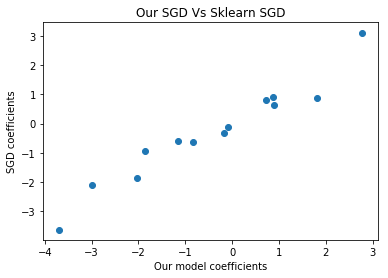

In [81]:
plt.scatter(W.T,clf.coef_)
plt.title('Our SGD Vs Sklearn SGD')
plt.xlabel('Our model coefficients')
plt.ylabel('SGD coefficients')
plt.show()

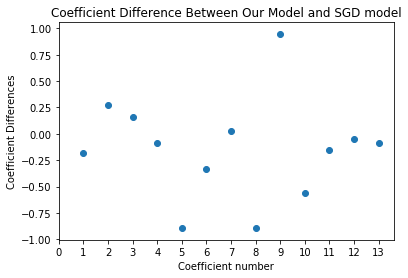

In [82]:
plt.scatter(range(1,14),Coeff_Diff.T)
plt.xlabel('Coefficient number')
plt.xticks(range(14))
plt.ylabel('Coefficient Differences')
plt.title('Coefficient Difference Between Our Model and SGD model')
plt.show()

##### Our model and sklearn SGD do not differ much in terms of coefficient vector

#### Comparing Intercept term of our SGD with sklearn SGD

In [83]:
print('='*65)
print('Our model intercept term: ',W0)
print('SGD intercept term: ',clf.intercept_[0])
print("Difference between two models' intercept terms:",np.absolute(clf.intercept_[0]-W0))
print('='*65)

Our model intercept term:  22.527795414604125
SGD intercept term:  22.385801548497565
Difference between two models' intercept terms: 0.14199386610656006


##### Intercept terms difference is not much

#### Scatter plots of  prediction of both manual and sklearn sgd

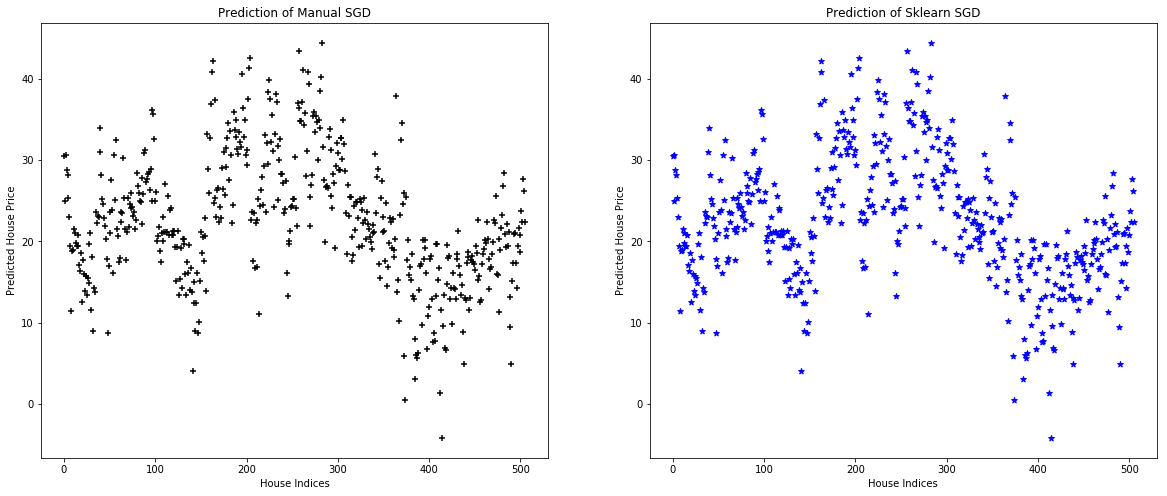

In [88]:
ax=plt.figure(figsize=(20,8))
ax1=plt.subplot(121)
ax1.set_title('Prediction of Manual SGD')
plt.scatter([i for i in range(X.shape[0])],y_pred,color='black',marker='+')
ax1.set_xlabel('House Indices')
ax1.set_ylabel('Predicted House Price')
ax2=plt.subplot(122)
ax2.set_title('Prediction of Sklearn SGD')
plt.scatter([i for i in range(X.shape[0])],y_pred,color='b',marker='*')
ax2.set_xlabel('House Indices')
ax2.set_ylabel('Predicted House Price')
plt.show()

In [89]:
list1=[['Own Model',W0,w_str,cod,mse],['Sklearn Linear Regression',LR.intercept_,LR_str,cod_lr,mse_lr],['Sklearn SGDRegressor',clf.intercept_,clf_str,cod_sgd,mse_sgd]]
colmn=['Model','Intercept','Coefficient','R2_Score','MSE']
df1=pd.DataFrame(list1,columns=colmn)

Comparison with Sklearn Linear Regression Model and Sklearn SGDRegressor

#### Summary
- First the boston house price Data was loaded in a pandas dataframe
- Gradient descent function was defined
- Optimum coefficient vector and intercept were calculated with the help of defined function
- MSE and R2_Score was calculated
- Then the model was compared with Sklearn linear regression and Sklearn SGDRegressor
- Coefficient vector of the model was compared with sklearn SGD
- Intercept terms are compared
- Scatter plot for predicted y values in all the 3 models have been plotted

In [90]:
print('Table of Comparision between the 3 models: ')
df1

Table of Comparision between the 3 models: 


,Model,Intercept,Coefficient,R2_Score,MSE
0,Own Model,22.5278,[-0.82848576 0.89728921 -0.17230825 0.717938...,0.739192,22.017310
1,Sklearn Linear Regression,22.5328,[-0.92041113 1.08098058 0.14296712 0.682203...,0.740608,21.897779
2,Sklearn SGDRegressor,[22.385801548497565],[-0.64572802 0.62800485 -0.33579684 0.801704...,0.633764,22.748816
